In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from data import data_preprocess
from evaluation import metrics
from model import end2end, end2end_crps

In [2]:
x_train, y_train, x_test, y_test = data_preprocess.data_preprocess('kin8nm')

In [3]:
end2end_model = end2end_crps.train_model(x_train, y_train, n_epoch = 500, hidden_layers = [100, 100, 100], learning_rate = 0.001, exp_decay = .995, calibration_threshold = .03)

initial loss:  0.42497169971466064
256 0.042414834721848996 tensor(-3.7060, grad_fn=<MeanBackward0>) tensor(0.0529, grad_fn=<MeanBackward0>)
258 0.08101945713517875 tensor(-3.6801, grad_fn=<MeanBackward0>) tensor(0.0539, grad_fn=<MeanBackward0>)
259 0.04696457941413597 tensor(-3.6481, grad_fn=<MeanBackward0>) tensor(0.0532, grad_fn=<MeanBackward0>)
260 0.20429107766729376 tensor(-3.5630, grad_fn=<MeanBackward0>) tensor(0.0574, grad_fn=<MeanBackward0>)
261 0.14508591776404187 tensor(-3.4967, grad_fn=<MeanBackward0>) tensor(0.0564, grad_fn=<MeanBackward0>)
262 0.4399795753829617 tensor(-3.2998, grad_fn=<MeanBackward0>) tensor(0.0651, grad_fn=<MeanBackward0>)
263 0.21435079279763497 tensor(-3.4038, grad_fn=<MeanBackward0>) tensor(0.0587, grad_fn=<MeanBackward0>)
264 0.42163069067454995 tensor(-3.3198, grad_fn=<MeanBackward0>) tensor(0.0648, grad_fn=<MeanBackward0>)
265 0.11543652244020418 tensor(-3.5617, grad_fn=<MeanBackward0>) tensor(0.0553, grad_fn=<MeanBackward0>)
266 0.17539013705993

382 0.052813114754098375 tensor(-3.9600, grad_fn=<MeanBackward0>) tensor(0.0470, grad_fn=<MeanBackward0>)
384 0.050643106691749575 tensor(-3.9649, grad_fn=<MeanBackward0>) tensor(0.0469, grad_fn=<MeanBackward0>)
386 0.04561722655200217 tensor(-3.9730, grad_fn=<MeanBackward0>) tensor(0.0467, grad_fn=<MeanBackward0>)
388 0.03965081967213117 tensor(-3.9824, grad_fn=<MeanBackward0>) tensor(0.0465, grad_fn=<MeanBackward0>)
390 0.033531523783929075 tensor(-3.9915, grad_fn=<MeanBackward0>) tensor(0.0463, grad_fn=<MeanBackward0>)
final loss:  -4.149160385131836


End2end test MAPE:  0.12632033
End2end test RMSE:  0.089832366
End2end test NLLK:  -3.693946
End2end test CRPS:  tensor(0.0498)


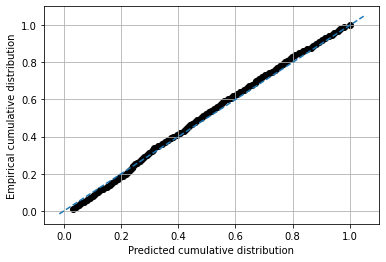

End2end test calibration error when step size is 0.001:  0.4103543956947896
End2end test calibration error when step size is 0.01:  0.04086858249033929
End2end test calibration error when step size is 0.1:  0.004034992633322245


In [4]:
mean_pred, var_pred = end2end_model(x_test)
mean_pred = mean_pred.detach().numpy()
var_pred = var_pred.detach().numpy()
sd_pred = np.sqrt(var_pred)

print('End2end test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
print('End2end test RMSE: ', metrics.rmse(y_test.detach().numpy(), mean_pred))
print('End2end test NLLK: ', metrics.nllk(y_test.detach().numpy(), mean_pred, var_pred))
print('End2end test CRPS: ', metrics.CRPSMetric(x = y_test.squeeze(dim = 1), loc = torch.tensor(mean_pred).squeeze(dim = 1), scale = torch.tensor(sd_pred).squeeze(dim = 1)).gaussian_crps().mean())

pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('End2end test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('End2end test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('End2end test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))